In [1]:
import pandas as pd
import src.limpieza_texto as lt
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Exportamos dataset

In [2]:
data = pd.read_csv("data/attacks.csv",encoding = "ISO-8859-1")

data.head(2)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN


## Quitamos los espacios en los nombres de las columnas

In [3]:
data.columns = data.columns.str.rstrip()

## Eliminamosn las columnas que no vamos a trabajar

In [4]:
data=data.drop(['Unnamed: 22', 'Unnamed: 23', 'Case Number', 'Case Number.1','href formula', 'href', 'pdf', 'Investigator or Source', 'original order'], axis=1)

In [6]:
data

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Case Number.2
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,2018.06.25
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,2018.06.18
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,2018.06.09
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,2018.06.08
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",2018.06.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Elimino las filas que estan compuestas unicamente por valores nan

In [8]:
data = data.dropna(axis=0, how="all")
data.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Case Number.2
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,2018.06.25
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,2018.06.18
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,2018.06.09
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,2018.06.08
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",2018.06.04


## Hipotesis:

**Surfistas** de **USA**, actividad mas atacada por el **tiburon blanco**

In [9]:
df_surfing=data[data['Activity'] == 'Surfing']

**Ploteo la grafica para saber en que paises los surfistas reciben mas ataques de tiburon.**

Aunque se vea un poco mal podemos observar que USA, Australia, South Africa, Brasil, Reunion y Nueva Zelanda, son los paises que han recibido un mayor numero de ataques.

<AxesSubplot:xlabel='count', ylabel='Country'>

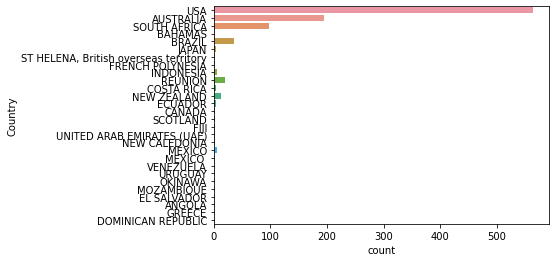

In [10]:
sns.countplot(y=df_surfing.Country, data=df_surfing)

In [11]:
data= df_surfing

Para trabajar mas comodos vamos a coger aquellos paises en los que los surfistas han recibido mas ataques de tiburones

In [12]:
#Exploro los valores de Country
data_country = data.Country.value_counts()
#Cojo las que tengan mas de 10 incidencias
data_country[data_country > 10]
#las añado a una variable
top_countries= data_country[data_country > 10].index
top_countries
data.Country.isin(top_countries)
#Filtro el dataset para que so,lo salgan los paises seleccionados
df_top_country= data[data.Country.isin(top_countries)]
df_top_country.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Case Number.2
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,2018.06.09
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,2018.06.08
15,12-May-2018,2018.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,"Nahoon Beach, East London",Surfing,male,M,NaN,"Minor injury, marks on board",N,11h00,NaN,2018.05.12
16,09-May-2018,2018.0,Questionable,AUSTRALIA,New South Wales,"Sharpes Beach, Ballina",Surfing,male,M,NaN,"No injury, surfboard damaged",N,10h30,Shark involvement not confirmed,2018.05.09
19,28-Apr-2018,2018.0,Unprovoked,AUSTRALIA,Western Australia,Gearys Beach,Surfing,Adam Murray,M,NaN,"No injury, knocked off board by shark",N,16h50,NaN,2018.04.28.a


<AxesSubplot:xlabel='count', ylabel='Country'>

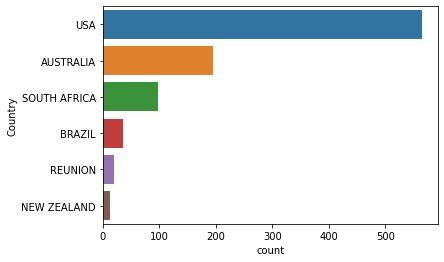

In [13]:
sns.countplot(y=df_top_country.Country, data=df_top_country)

**Representa el numero de ataques a surfistas en los diferentes paises**

In [14]:
df_top_country.Type.value_counts()

Unprovoked      872
Invalid          38
Provoked         11
Questionable      2
Name: Type, dtype: int64

## Limpieza de columna species

In [15]:
#Transoformo la columna Species en un string
df_top_country["species"] = df_top_country["Species"].apply(lt.change_str)

<ipython-input-15-3209234a552a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_country["species"] = df_top_country["Species"].apply(lt.change_str)


In [16]:
#uso metodo regex para obtener informacion mas limpia
df_top_country['species']= df_top_country.species.str.extract(r'(\w+\sshark)')

<ipython-input-16-82dbc5552b91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_country['species']= df_top_country.species.str.extract(r'(\w+\sshark)')


In [17]:
#Cambio el type de la nueva columna a str
df_top_country['species'] = df_top_country['species'].apply(lt.change_str)

<ipython-input-17-8732d45be86b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_country['species'] = df_top_country['species'].apply(lt.change_str)


In [18]:
#Aplico la funcion para que todas sean minusculas
df_top_country['species'] = df_top_country['species'].apply(lt.minusculas)

<ipython-input-18-a26240c7816b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_country['species'] = df_top_country['species'].apply(lt.minusculas)


In [19]:
df_top_country.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Case Number.2,species
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,2018.06.09,nan
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,2018.06.08,m shark
15,12-May-2018,2018.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,"Nahoon Beach, East London",Surfing,male,M,NaN,"Minor injury, marks on board",N,11h00,NaN,2018.05.12,nan
16,09-May-2018,2018.0,Questionable,AUSTRALIA,New South Wales,"Sharpes Beach, Ballina",Surfing,male,M,NaN,"No injury, surfboard damaged",N,10h30,Shark involvement not confirmed,2018.05.09,nan
19,28-Apr-2018,2018.0,Unprovoked,AUSTRALIA,Western Australia,Gearys Beach,Surfing,Adam Murray,M,NaN,"No injury, knocked off board by shark",N,16h50,NaN,2018.04.28.a,nan


In [20]:
df_top_country.species.value_counts()

nan                  546
white shark          146
tiger shark           48
m shark               32
spinner shark         28
whaler shark          22
bull shark            21
blacktip shark        18
wobbegong shark        9
raggedtooth shark      9
small shark            8
no shark               7
reef shark             3
lemon shark            3
hammerhead shark       3
nurse shark            3
sand shark             2
sandbar shark          2
gill shark             2
zambezi shark          1
2 shark                1
2m shark               1
metre shark            1
colored shark          1
sevengill shark        1
dusky shark            1
whale shark            1
finned shark           1
juvenile shark         1
as shark               1
blue shark             1
Name: species, dtype: int64

In [21]:
#Recojo los casos producidos por los tiburones que mas veces han atacado
df = df_top_country[df_top_country['species'].isin(['white shark', 'bull shark', 'tiger shark', 'whaler shark', 'raggedtooth shark ', 'blacktip shark', 'wobbegong shark', 'spinner shark'])]

In [23]:
df.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Case Number.2,species
22,24-Apr-2018,2018.0,Unprovoked,AUSTRALIA,Western Australia,"South Point, Gracetown",Surfing,Nathan Burch,M,NaN,"No injury, shark struck his leg",N,Afternoon,"White shark, 3.5 m",2018.04.24,white shark
34,03-Apr-2018,2018.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,St. Francis Bay,Surfing,Ross Spowart,M,19,Lacerations to left knee & lower leg,N,15h00,White shark,2018.04.03,white shark
52,05-Jan-2018,2018.0,Unprovoked,AUSTRALIA,Western Australia,"South Point, Gracetown",Surfing,Justin,M,NaN,Foot bitten,N,NaN,Wobbegong shark?,2018.01.05,wobbegong shark
53,31-Dec-2017,2017.0,Unprovoked,USA,Hawaii,"Hultin's Beach, Oahu",Surfing,Marjorie Mariano,F,54,Severe lacerations to left thigh & knee,N,18h00,Tiger shark,2017.12.31,tiger shark
66,28-Oct-2017,2017.0,Unprovoked,AUSTRALIA,New South Wales,Birubi Point,Surfing,male,M,31,Minor injury to foot,N,09h00,"Wobbegong shark, 1 m",2017.10.28,wobbegong shark


In [24]:
df.Age.unique()

array([nan, '19', '54', '31', '35', '37', '13', '17', '28', '65', '25',
       '20', '22', '29', '43', '42', '21', '14', '52', '40', '45', '34',
       '38', '23', '47', '26', '50', '15', '41', '10', '18', '16', '32',
       '39', '48', '24', '61', '44', '53', '51', '27', '49', '33', '55',
       '46', '30', '36', '59', '57', '30 or 36', '12', ' 28'],
      dtype=object)

In [25]:
df['Age']=df['Age'].fillna(0)
df['Age']=df['Age'].replace({'30 or 36':'33'})

<ipython-input-25-f66b11949026>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age']=df['Age'].fillna(0)
<ipython-input-25-f66b11949026>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age']=df['Age'].replace({'30 or 36':'33'})


In [27]:
df.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Case Number.2,species
22,24-Apr-2018,2018.0,Unprovoked,AUSTRALIA,Western Australia,"South Point, Gracetown",Surfing,Nathan Burch,M,0,"No injury, shark struck his leg",N,Afternoon,"White shark, 3.5 m",2018.04.24,white shark
34,03-Apr-2018,2018.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,St. Francis Bay,Surfing,Ross Spowart,M,19,Lacerations to left knee & lower leg,N,15h00,White shark,2018.04.03,white shark
52,05-Jan-2018,2018.0,Unprovoked,AUSTRALIA,Western Australia,"South Point, Gracetown",Surfing,Justin,M,0,Foot bitten,N,NaN,Wobbegong shark?,2018.01.05,wobbegong shark
53,31-Dec-2017,2017.0,Unprovoked,USA,Hawaii,"Hultin's Beach, Oahu",Surfing,Marjorie Mariano,F,54,Severe lacerations to left thigh & knee,N,18h00,Tiger shark,2017.12.31,tiger shark
66,28-Oct-2017,2017.0,Unprovoked,AUSTRALIA,New South Wales,Birubi Point,Surfing,male,M,31,Minor injury to foot,N,09h00,"Wobbegong shark, 1 m",2017.10.28,wobbegong shark


In [28]:
df['Age']=df['Age'].dropna().apply(lt.change_int)

<ipython-input-28-aa5838f13316>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age']=df['Age'].dropna().apply(lt.change_int)


In [34]:
df['Age']=df.Age.replace({0:24.8})

In [30]:
df.Age.mean()

24.815068493150687

In [31]:
df['Year']=df['Year'].apply(lt.change_int)

<ipython-input-31-93703324c8c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year']=df['Year'].apply(lt.change_int)


In [32]:
df=df.drop(['Injury', 'Species', 'Case Number.2'],axis=1)

In [35]:
df

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Fatal (Y/N),Time,species
22,24-Apr-2018,2018,Unprovoked,AUSTRALIA,Western Australia,"South Point, Gracetown",Surfing,Nathan Burch,M,24.8,N,Afternoon,white shark
34,03-Apr-2018,2018,Unprovoked,SOUTH AFRICA,Eastern Cape Province,St. Francis Bay,Surfing,Ross Spowart,M,19.0,N,15h00,white shark
52,05-Jan-2018,2018,Unprovoked,AUSTRALIA,Western Australia,"South Point, Gracetown",Surfing,Justin,M,24.8,N,NaN,wobbegong shark
53,31-Dec-2017,2017,Unprovoked,USA,Hawaii,"Hultin's Beach, Oahu",Surfing,Marjorie Mariano,F,54.0,N,18h00,tiger shark
66,28-Oct-2017,2017,Unprovoked,AUSTRALIA,New South Wales,Birubi Point,Surfing,male,M,31.0,N,09h00,wobbegong shark
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3439,09-Mar-1969,1969,Unprovoked,USA,Hawaii,"Makaha, O'ahu",Surfing,Licius Lee,M,16.0,N,17h30,white shark
3447,25-Dec-1968,1968,Unprovoked,NEW ZEALAND,South Island,"St. Clair Beach, Dunedin",Surfing,Gary Barton,M,17.0,N,17h45,white shark
3848,14-Jan-1962,1962,Unprovoked,AUSTRALIA,New South Wales,"Lennox Head, Ballina",Surfing,Gary Raymond Hiscocks,M,19.0,N,13h30,whaler shark
3999,12-Apr-1960,1960,Unprovoked,AUSTRALIA,New South Wales,"Horseshoe Bay, near Kempsey",Surfing,Ivan Chandler,M,17.0,N,Late afternoon,white shark


In [36]:
df.to_csv("data/clean-sharks.csv")

In [ ]:
!pwd